# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

Part 1

m(bX) = b * m(X)

m(a) = a

m(a + bX) = a + b * m(X)


Part 2

cov(X, Y) = E((X - E(X))(Y-E(Y)))

cov(X, a + bY) = E((X - E(X))((a+bY) - E(a + bY)))

= E((X - E(X))(b(Y - E(Y))))

= b(E((X - E(X))(Y-E(Y))))

= b * cov(X, Y)

Part 3

Cov(X, a + bX) = b* Cov(X,Y)

Cov(a + bX, a + bX) = b^2 * Cov(X,X)

Cov(X,X) = (X -E(X))^2 = s^2

Part 4

No, not necessarily. If g is not strictly increasing or nonlinear the median can be changed with the transformation. For example if g(x) = X^2, M = 0.

0^2 = 0

median(X^2) not necessarily 0

This same argument does hold true for any quantile.

The IQR and range are not necessarily preserved under any non-decreasing function.





Part 5

No, it is not always true.
E(g(X)) does not equal g(E(X)) for any non-linear function.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

Part 1

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving airbnb_hw (1).csv to airbnb_hw (1) (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('ForeignGifts_edu.csv')
df.head()


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


Part 2

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

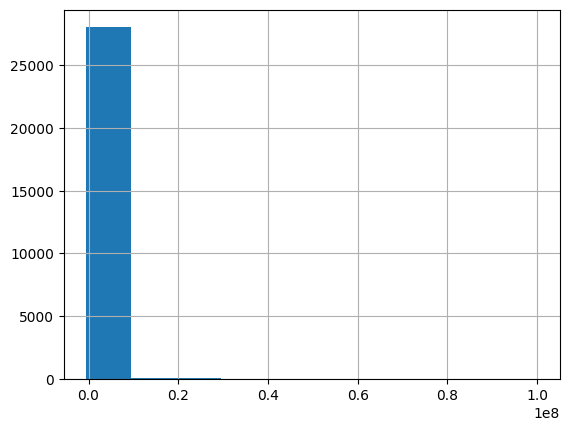

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['Foreign Gift Amount'].hist()
df['fga_log'] = np.log(df['Foreign Gift Amount'])
df['fga_log'].hist() # This crashes: We need to locate the non-infinte values
#df.loc[df['fga_log']>0,'fga_log'].hist(bins=20,grid=False)


The variable is a numeric value that states the amount of money each foreign gift pertains to that a University receives. The histogram shows that there are many relatively small donations that are skewed by very long donations. This gives the graph a right skew with a long tail.

Part 3

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Proportion of Contract Gifts: 0.6121
Proportion of Real Estate Gifts: 0.0004
Proportion of Monetary Gifts: 0.3875


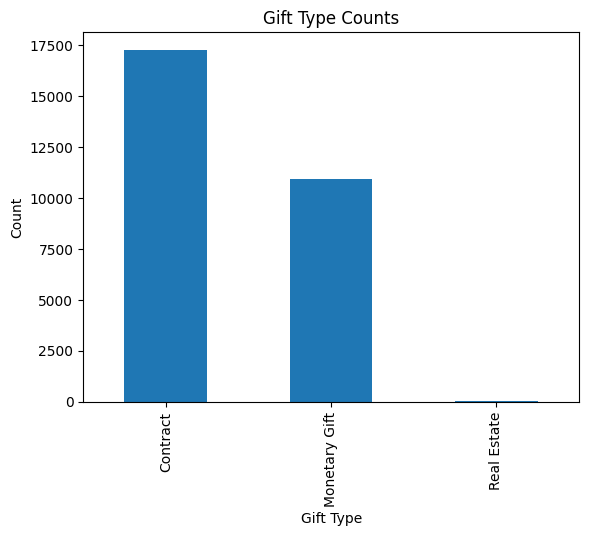

In [ ]:
gift_type_counts = df['Gift Type'].value_counts()
print(gift_type_counts)

total_gifts = len(df)
contract_proportion = gift_type_counts['Contract'] / total_gifts
real_estate_proportion = gift_type_counts['Real Estate'] / total_gifts
monetary_proportion = gift_type_counts['Monetary Gift'] / total_gifts

print(f"\nProportion of Contract Gifts: {contract_proportion:.4f}")
print(f"Proportion of Real Estate Gifts: {real_estate_proportion:.4f}")
print(f"Proportion of Monetary Gifts: {monetary_proportion:.4f}")

gift_type_counts.plot(kind='bar')
plt.title('Gift Type Counts')
plt.xlabel('Gift Type')
plt.ylabel('Count')
plt.show()


Part 4

<ipython-input-26-7fd4aef8bf7c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['fga_log'], shade=True)


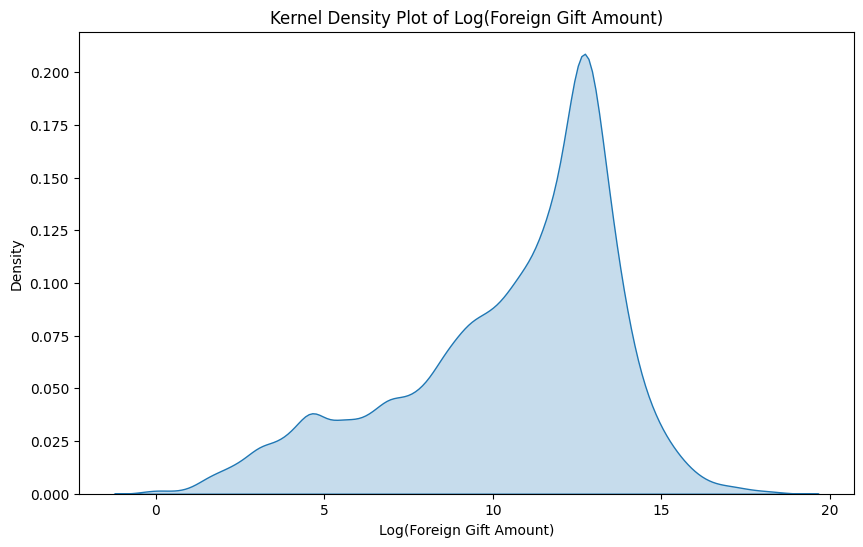

<ipython-input-26-7fd4aef8bf7c>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='fga_log', hue='Gift Type', shade=True)


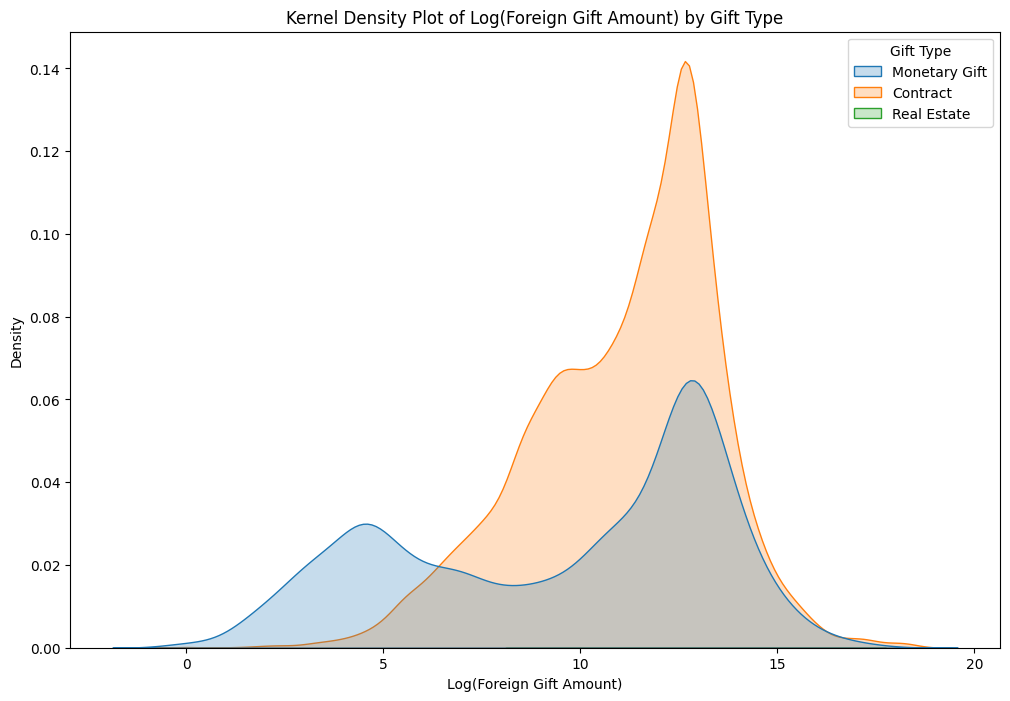

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['fga_log'], shade=True)
plt.title('Kernel Density Plot of Log(Foreign Gift Amount)')
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='fga_log', hue='Gift Type', shade=True)
plt.title('Kernel Density Plot of Log(Foreign Gift Amount) by Gift Type')
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.show()



The log of the total amount is very similar to the contract gifts. They seem to spike around 12. The real estate gifts don't appear on the plot, most likely due to the sparse sample. The density of the monetary gifts are more uniformly distributed.

Part 5

In [ ]:
top_countries_by_count = df.groupby('Country of Giftor')['Foreign Gift Amount'].count().sort_values(ascending=False).head(15)
print("Top 15 countries by number of gifts:")
print(top_countries_by_count)

top_countries_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 countries by total gift amount:")
top_countries_by_amount


Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

Top 15 countries by total gift amount:


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


Part 6


Top 15 institutions by total gift amount:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


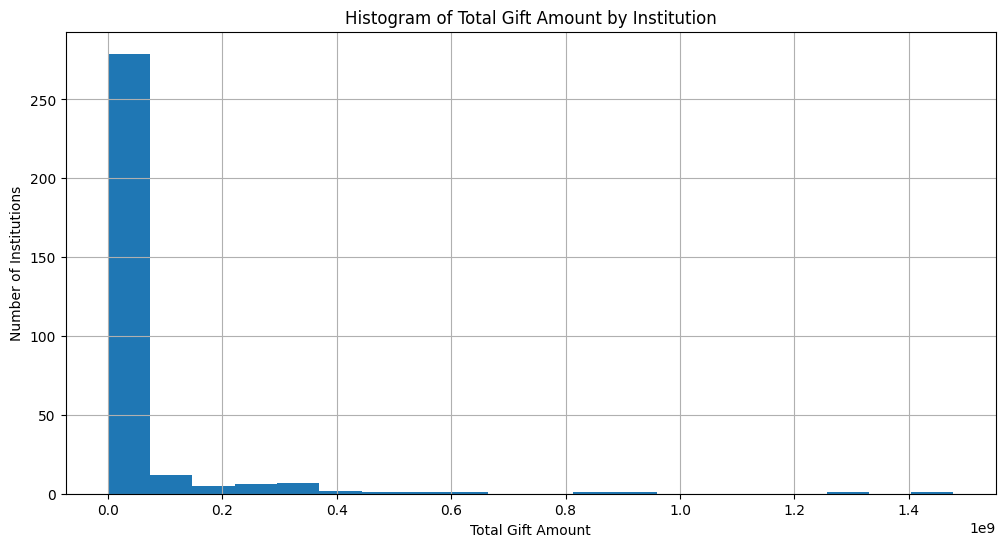

In [ ]:
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 institutions by total gift amount:")
print(top_institutions)

plt.figure(figsize=(12, 6))
df.groupby('Institution Name')['Foreign Gift Amount'].sum().hist(bins=20)
plt.title('Histogram of Total Gift Amount by Institution')
plt.xlabel('Total Gift Amount')
plt.ylabel('Number of Institutions')
plt.show()


Part 7

In [ ]:
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 giftors by total gift amount:")
top_giftors



Top 15 giftors by total gift amount:


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

Part 1

In [ ]:
df3 = pd.read_csv('airbnb_hw (1) (1).csv')
df3.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Part 2

In [ ]:
print("Dimensions of the data:", df3.shape)
print("Number of observations:", df3.shape[0])
print("Variables included:\n", df3.columns.tolist())
print("\nFirst few rows of data:")
print(df3.head())


Dimensions of the data: (30478, 13)
Number of observations: 30478
Variables included:
 ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']

First few rows of data:
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room 

Part 3

In [ ]:
cross_tab = pd.crosstab(df3['Room Type'], df3['Property Type'])
print(cross_tab)




Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

The most common types of rentals are houses, apartments, and lofts. Houses and Bed & Breakfast rentals are more likely to be a private room rather than the entire home.

Part 4

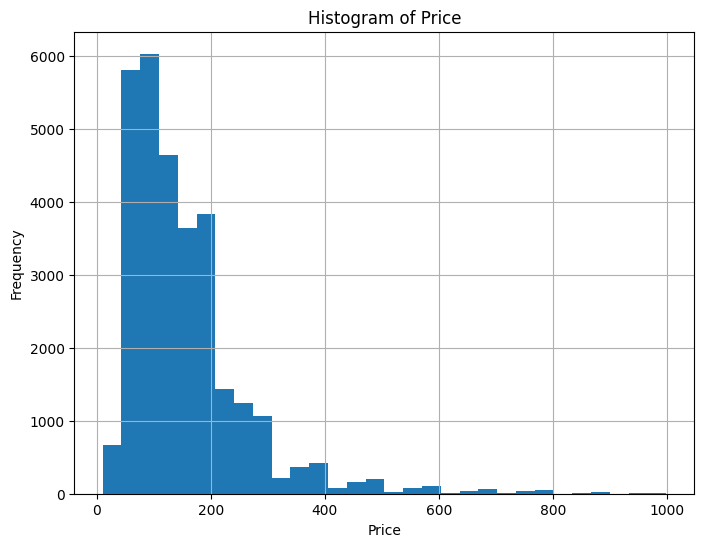

<ipython-input-68-3705b69cbd52>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3['Price'], shade=True)


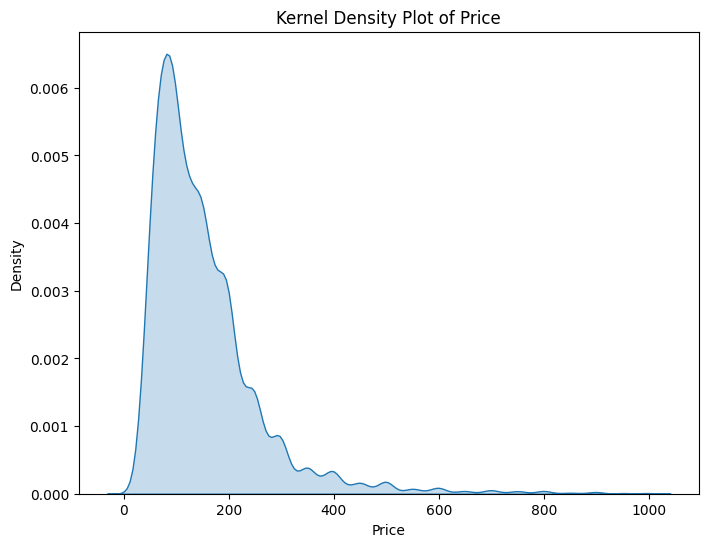

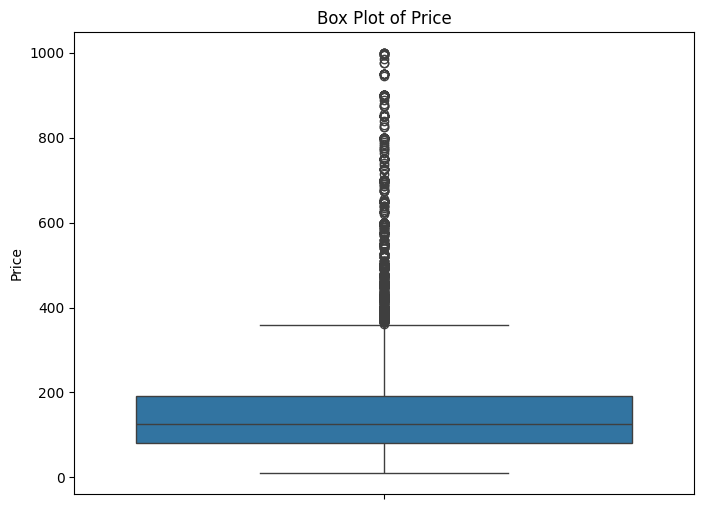

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


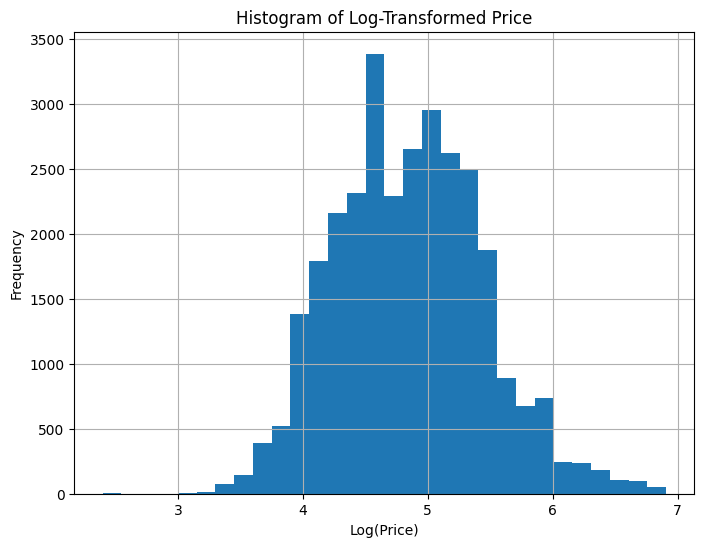

<ipython-input-68-3705b69cbd52>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df3['price_log'], shade=True)


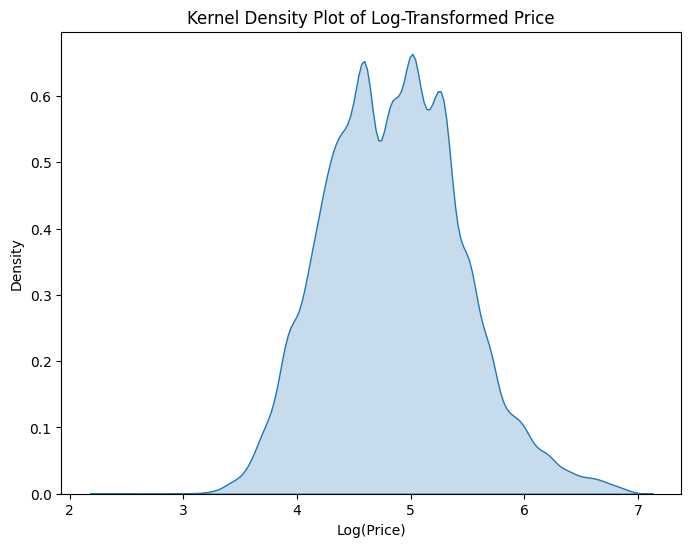

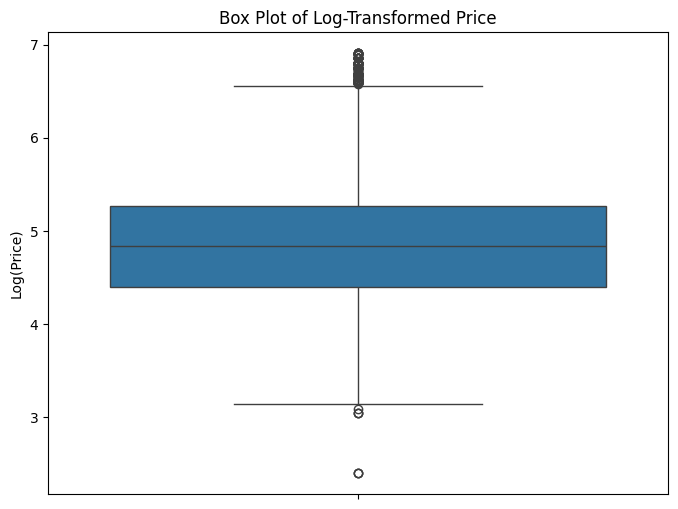

count    30297.000000
mean         4.854625
std          0.591928
min          2.397895
25%          4.394449
50%          4.836282
75%          5.262690
max          6.907755
Name: price_log, dtype: float64


In [ ]:
df3["Price"] = pd.to_numeric(df3["Price"], errors="coerce")

plt.figure(figsize=(8, 6))
df3['Price'].hist(bins=30)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df3['Price'], shade=True)
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df3['Price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

print(df3['Price'].describe())

# The data is badly scaled and there are many outliers. The distribution of the data appears skewed to the right. The mean is significantly larger than the median due to outliers.

df3['price_log'] = np.log1p(df3['Price']) # Use log1p to avoid log(0)

plt.figure(figsize=(8, 6))
df3['price_log'].hist(bins=30)
plt.title('Histogram of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df3['price_log'], shade=True)
plt.title('Kernel Density Plot of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df3['price_log'])
plt.title('Box Plot of Log-Transformed Price')
plt.ylabel('Log(Price)')
plt.show()

print(df3['price_log'].describe())


Part 5

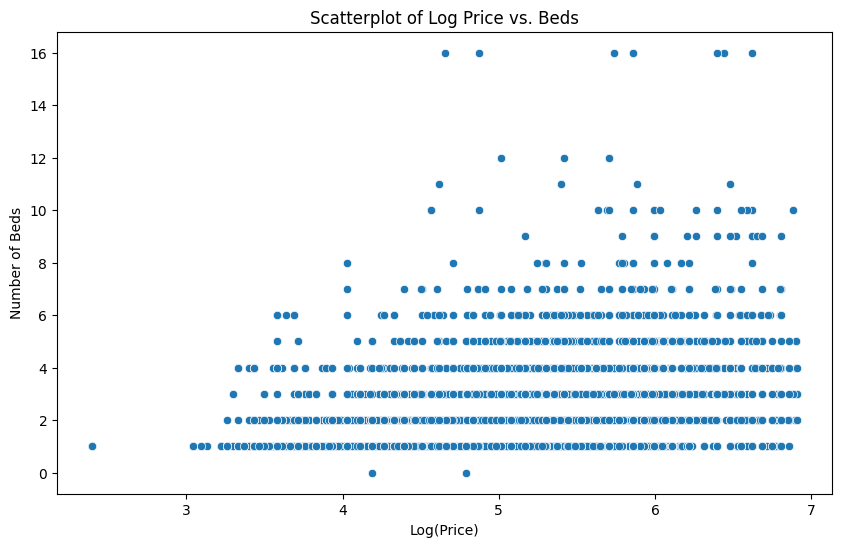

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_log', y='Beds', data=df3)
plt.title('Scatterplot of Log Price vs. Beds')
plt.xlabel('Log(Price)')
plt.ylabel('Number of Beds')
plt.show()


price_by_beds = df3.groupby('Beds')['Price'].describe()
price_by_beds



It seems that for the most part the average price increases as the number of beds increase. The same appears the happen with the standard deviation.

Part 6

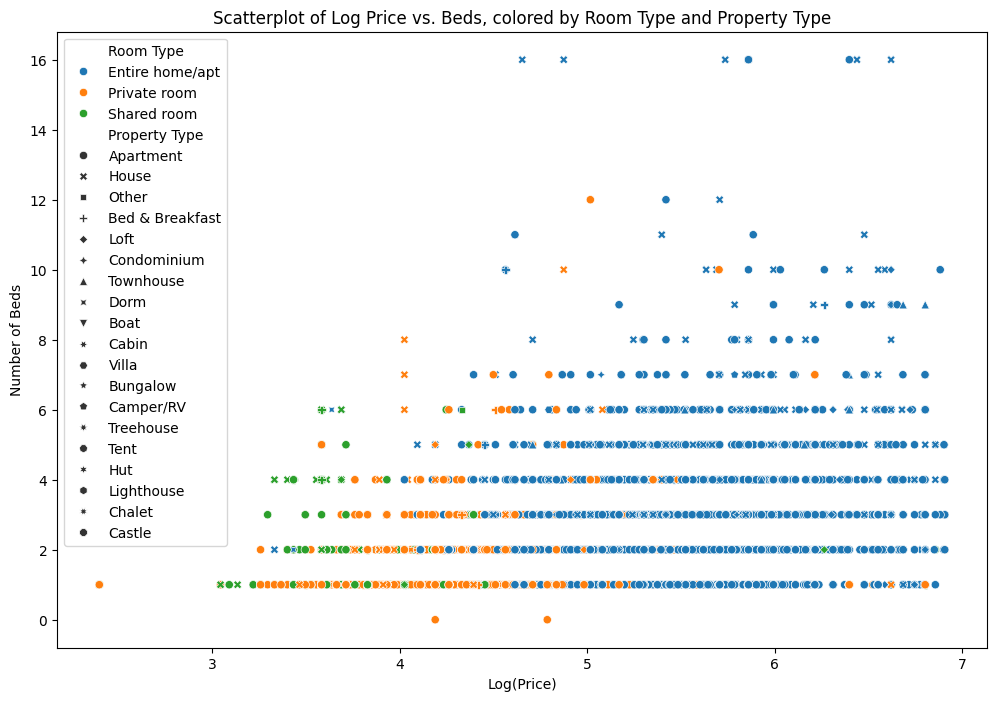

count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.00  985.0  
                Other            123.75  177.5  350.00  850.0  
                Townhouse        135.00  189.0  295.00  900.0  

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price_log', y='Beds', hue='Room Type', style='Property Type', data=df3)
plt.title('Scatterplot of Log Price vs. Beds, colored by Room Type and Property Type')
plt.xlabel('Log(Price)')
plt.ylabel('Number of Beds')
plt.show()

price_by_room_property = df3.groupby(['Room Type', 'Property Type'])['Price'].describe()
price_by_room_property



From the scatterplot it seems that the renting the entire house/apartment is much more expensive. The highest price on average is renting the entire home for the other category. The other category for renting the entire house also has the highest standard deviation. The median seems to be a more reliable estimator due to the large amount of outliers.


Part 7

<Figure size 1000x800 with 0 Axes>

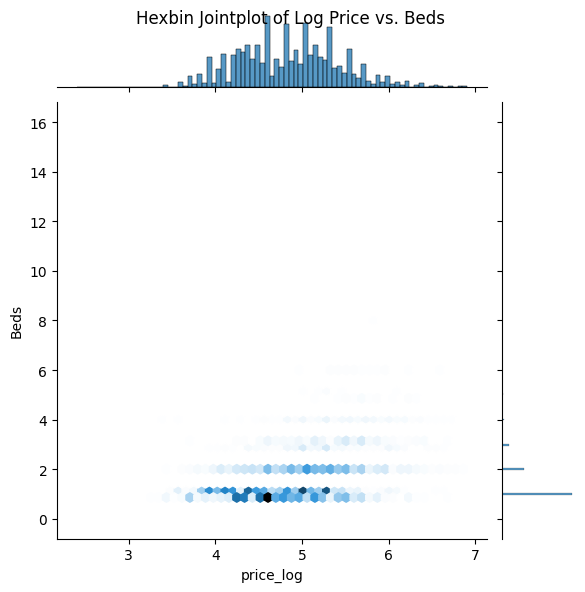

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.jointplot(x='price_log', y='Beds', data=df3, kind='hex')
plt.suptitle('Hexbin Jointplot of Log Price vs. Beds')
plt.show()


This plot is interesting and shows me how much of the code is condensed over the 1 to 2 bedrooms. It does not necessarily change how I think.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

Part 1

In [ ]:

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


uploaded = files.upload()


Saving drilling_rigs.csv to drilling_rigs (2).csv


In [ ]:
df = pd.read_csv('drilling_rigs (2).csv')

print(df.head())
print(df.info())
print("\nNumber of observations:", len(df))
print("Number of variables:", len(df.columns))


           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                                           

The month column needs to be converted to datetime. The numeric columns need to be transformed. The missing values need to be replaced with the appropriate strategy. The column names need to be made much simpler.

Part 2

In [ ]:

df['time'] = pd.to_datetime(df['Month'], format='mixed')


Part 3

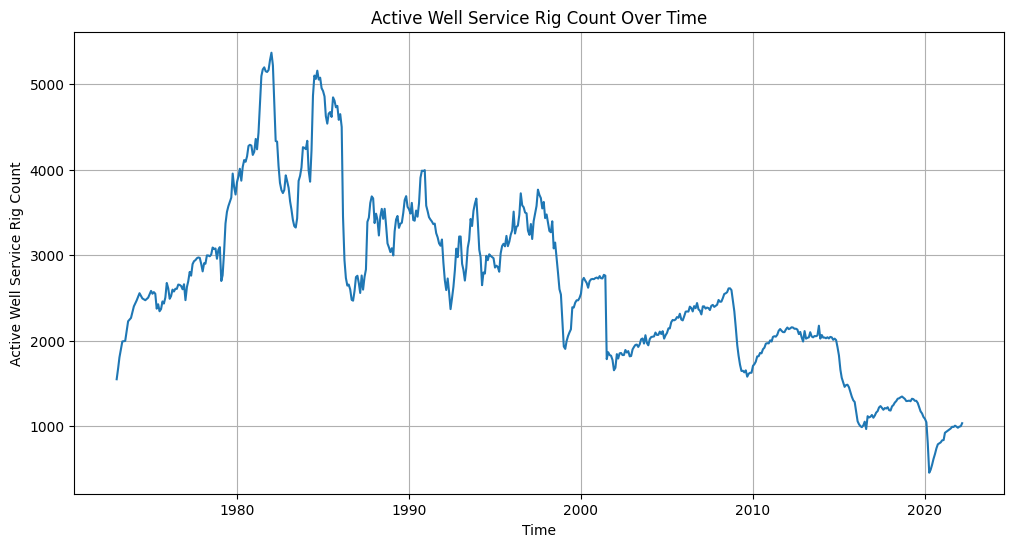

In [ ]:
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'])
plt.xlabel('Time')
plt.ylabel('Active Well Service Rig Count')
plt.title('Active Well Service Rig Count Over Time')
plt.grid(True)
plt.show()



There seems to be a decreasing trend since the 1980s. Before the 80s it seems to be a generally increasing trend.

Part 4

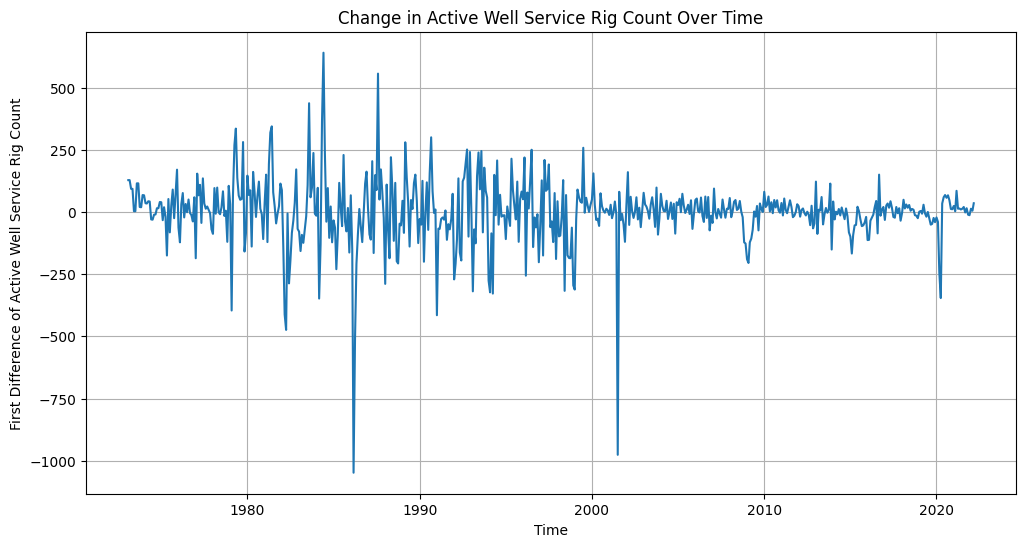

In [ ]:
df['Rig_Count_Diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Rig_Count_Diff'])
plt.xlabel('Time')
plt.ylabel('First Difference of Active Well Service Rig Count')
plt.title('Change in Active Well Service Rig Count Over Time')
plt.grid(True)
plt.show()




The plot seems to be show some erratic change in both magnitudes, but the rate of change seems to be less variable after that.

Part 5

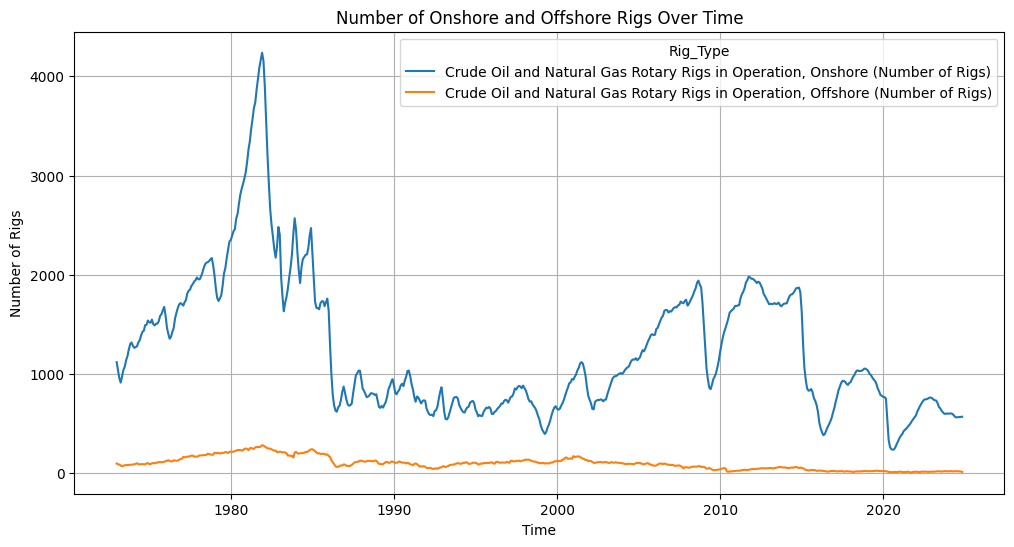

In [ ]:
df_melted = pd.melt(df, id_vars='time', value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'], var_name='Rig_Type', value_name='Rig_Count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='Rig_Count', hue='Rig_Type', data=df_melted)
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Number of Onshore and Offshore Rigs Over Time')
plt.grid(True)
plt.show()
